<a href="https://colab.research.google.com/github/krisnabhakti09/Data-Mining/blob/main/Klasifikasi_Data_dengan_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
dataset = pd.read_csv("Data_Set.csv")
x = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, -1].values

In [9]:
print(x)

[[   20 50000]
 [   21 45000]
 [   19 61000]
 [   20 44000]
 [   19 56000]
 [   21 79000]
 [   19 95000]
 [   20 40000]
 [   20 32000]
 [   21 48000]
 [   20 51000]
 [   20 55000]
 [   20 53000]
 [   19 64000]
 [   20 43000]]


In [10]:
print(y)

[1 0 1 0 1 1 1 0 0 0 1 1 1 1 0]


In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [12]:
print(x_train)

[[   20 43000]
 [   19 56000]
 [   19 61000]
 [   19 64000]
 [   20 51000]
 [   20 40000]
 [   20 55000]
 [   20 44000]
 [   20 50000]
 [   21 79000]
 [   20 53000]]


In [13]:
print(x_test)

[[   21 45000]
 [   19 95000]
 [   20 32000]
 [   21 48000]]


In [14]:
print(y_train)

[0 1 1 1 1 0 1 0 1 1 1]


In [15]:
print(y_test)

[0 1 0 0]


In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [17]:
print(x_train)

[[ 0.31622777 -1.06105475]
 [-1.42302495  0.17252923]
 [-1.42302495  0.6469846 ]
 [-1.42302495  0.93165783]
 [ 0.31622777 -0.30192615]
 [ 0.31622777 -1.34572797]
 [ 0.31622777  0.07763815]
 [ 0.31622777 -0.96616367]
 [ 0.31622777 -0.39681722]
 [ 2.05548048  2.35502395]
 [ 0.31622777 -0.112144  ]]


In [18]:
print(x_test)

[[ 2.05548048 -0.8712726 ]
 [-1.42302495  3.87328115]
 [ 0.31622777 -2.10485657]
 [ 2.05548048 -0.58659937]]


In [19]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [21]:
y_pred = classifier.predict(x_test)

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[0 3]
 [0 1]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


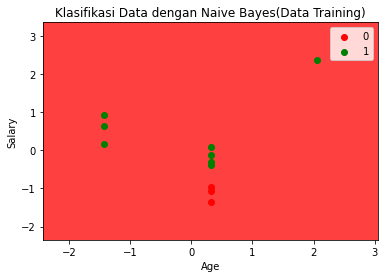

In [23]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set==j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifikasi Data dengan Naive Bayes(Data Training)')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()